Contents

  - <a href='#Feasibility-of-ammonia-aqua-system'>Feasibility of ammonia-aqua system¶</a>
    - <a href='#System-diagram'>System diagram¶</a>
    - <a href='#Code'>Code¶</a>
      - <a href='#Constrained-input-chiller-usage'>Constrained input chiller usage¶</a>
      - <a href='#Optimization-method'>Optimization method¶</a>
    - <a href='#Run-the-thing-already'>Run the thing already¶</a>
    - <a href='#Appendix'>Appendix¶</a>


# Optimization of ammonia-aqua system

The purpose of this notebook is to integrate the feasibility constraints developed for the ammonia-aqua chiller (in notebook `Feasibility of ammonia-aqua chiller`) into the previously attempted optimization methods (`optimize_trials2_5`). 

## System diagram

In [1]:
%%html
<img src="../img/Diagram_for_ammonia.svg">
<img src="./img/Diagram_for_ammonia.svg">

## Code

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
import CoolProp.CoolProp as CP
from ammonia_props import massFractionToMolar, AmmoniaProps
import numpy
from numpy import array, nan, inf
import matplotlib.pyplot as plt
from IPython.display import HTML, SVG, clear_output
import pandas

### Constrained input chiller usage

In [26]:
from aqua_chiller_spec1 import AquaChillerSpec1, makeSpec

In [27]:
spec=makeSpec()
spec

T_abs       300.0000
T_cond      300.0000
T_evap      278.0000
T_gen       380.0000
T_rect      310.0000
x_refrig      0.9998
dtype: float64

In [28]:
list(spec.items())

[('T_abs', 300.0),
 ('T_cond', 300.0),
 ('T_evap', 278.0),
 ('T_gen', 380.0),
 ('T_rect', 310.0),
 ('x_refrig', 0.99980000000000002)]

In [29]:
spec.tolist()

[300.0, 300.0, 278.0, 380.0, 310.0, 0.9998]

In [30]:
numpy.array(spec)

array([ 300.    ,  300.    ,  278.    ,  380.    ,  310.    ,    0.9998])

In [31]:
a1 = AquaChillerSpec1(spec)
display(a1)

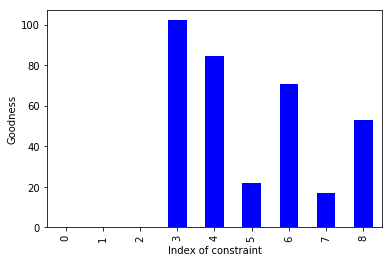

In [32]:
import matplotlib.pyplot as plt
cons = a1.C
colors = cons.map(lambda c: 'b' if c > 0 else 'r')
b = cons.plot.bar(color="".join(colors.tolist()))
plt.xlabel("Index of constraint")
plt.ylabel("Goodness")
plt.show()

In [33]:
import ammonia1
mspec = a1.mapped
ch = ammonia1.AmmoniaChiller()
ch.update(x_refrig=mspec.x_refrig, T_evap=mspec.T_evap, T_cond=mspec.T_cond,
          T_abs_outlet=mspec.T_abs, T_gen_outlet=mspec.T_gen, T_rect=mspec.T_rect)
ch

,T,P,x,h,s,u,v,Qu
rich_abs_outlet,300,4.75071,0.581104,-110.759,0.247664,-111.357,0.00125933,0
rich_pump_outlet,300.093,10.6161,0.581104,-109.835,0.248279,-111.172,0.00125904,-0.001
rich_shx_outlet,328.029,10.6161,0.581104,35.8367,0.709608,32.4073,0.00323039,0.0140751
rich_gen_sat_liquid,327.237,10.6161,0.581104,14.5218,0.645112,13.1365,0.00130494,0
weak_gen_outlet,380,10.6161,0.296492,278.322,1.35832,277.029,0.00121791,0
weak_shx_outlet,324.469,10.6161,0.296492,33.6281,0.662697,32.42,0.00113796,-0.001
weak_exp_outlet,324.58,4.75071,0.296492,33.6281,0.664754,33.0873,0.00113842,-0.001
gen_vapor_outlet,327.237,10.6161,0.996394,1370.77,4.57101,1224.43,0.137843,1
gen_reflux_inlet,327.237,10.6161,0.581024,14.3941,0.644571,13.0086,0.0013051,0
refrig_rect_outlet,310,10.6161,0.9998,1319.41,4.40903,1183.88,0.127667,1.001


In [76]:
import system_aqua1
T_heat_reject = 290
xB = [400, 10, T_heat_reject, 100, T_heat_reject, 50, 285, 40, T_heat_reject, 10]
bdry = system_aqua1.makeBoundary(xB)
bdry

stream,T_inlet,mdot,cp
heat,400,10,4.179
absorberReject,290,100,4.179
condReject,290,50,4.179
cold,285,40,4.179
rectifierReject,290,10,4.179


In [77]:
sys = system_aqua1.System(bdry, ch)
sys

C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


,deltaT,epsilon,UA,Q,error
gen,73.0141,0,11.2315,323.081,0
rect,35.9801,0,3.62711,237.339,0
abs,38.0021,0,32.9442,315.334,0
cond,10.7363,0,-0.0840184,-0.920941,-0
evap,8.66214,0,28.8169,228.28,0


In [78]:
# Concatenate the chiller and system constraints with Scipy sign convention (`g_i >= 0` = feasible).
# Chiller constraints already have correct sign.
# System level constraints are: each HX closest approach temperature is above a minimum threshold.
# The optimizer can cast this to numpy.array or treat as integer-indexed list.
#all_constraints=pandas.concat([cons, sys.df.deltaT - 1.0])
all_constraints=pandas.concat([cons, -sys.df.error])
all_constraints

0              0
1         0.0998
2       0.000199
3        102.066
4        84.6388
5             22
6        70.5029
7        16.9494
8        52.7634
gen           -0
rect          -0
abs           -0
cond           0
evap          -0
dtype: object

In [39]:
all_constraints.shape

(14,)

### Optimization method

In [40]:
import matplotlib.pyplot as plt
import ammonia1
import system_aqua1

In [22]:
?system_aqua1.makeChiller

In [41]:
from optimize_aqua import Problem_A, Problem_B
import scipy

def standard_boundary(t_heat_reject):
    tr = t_heat_reject
    xB = [400, 1, tr, 3, tr, 5, 285, 4, tr, 0.15]
    bdry = system_aqua1.makeBoundary(xB)
    return bdry

def standard_chiller_guess(t_heat_reject):
    rt = t_heat_reject
    #makeSpec(T_abs=300,T_cond=300,T_evap=278,T_gen=380,T_rect=310,x_refrig=0.9998)
    #ch.update(x_refrig=spec.x_refrig, T_evap=spec.T_evap, T_cond=spec.T_cond,
    #      T_abs_outlet=spec.T_abs, T_gen_outlet=spec.T_gen, T_rect=spec.T_rect)
    #x0 = numpy.array([0.05, 278.45, rT+7, rT+8, rT+5, 395.15])
    x0 = makeSpec(T_abs=rt+5, T_cond=rt+8, T_evap=278.45, T_gen=395.15, T_rect=rt+7, x_refrig=0.9998)
    return x0

def display_result(x):
    try:
        print("X = ")
        display(x)
        ch = system_aqua1.makeChiller(x)
        sys = system_aqua1.System(bdry, ch)
        display(sys)
    except KeyboardInterrupt as e:
        raise e
    except Exception as e:
        display(e)

def optimize_progressive(P, x0, n_calls=[10,30,50], maxiter=[50,50,50], rhobeg=[1,1,1]):
    # P: Problem_A or Problem_B object
    x = x0.copy()
    for nc, mi, rb in zip(n_calls, maxiter, rhobeg):
        display("Progressing toward one pass at optimization")
        P.n_calls = 7 * nc
        # For constraints argument:
        # COBYLA accepts funs that return a list (P.constraints_all)
        # SLSQP accepts only funs that return one constraint (P.constraints_each)
        opt = scipy.optimize.minimize(P.objective, x, method="COBYLA",
                              constraints=P.constraints_all, #callback=P.callback,
                              options={'disp':True,'maxiter':mi,'rhobeg':rb})
        
        print(opt)
        print(P.constraint(opt.x))
        #display_result(x)
    return opt


def opt_step_1(t_heat_reject):
    # Step 1: optimize heat 
    rT = t_heat_reject
    bdry = standard_boundary(rT)
    PA = Problem_A(bdry)
    x0 = standard_chiller_guess(rT)
    opt = optimize_progressive(PA, x0, n_calls=[10,30,50], maxiter=[5,5,5], rhobeg=[0.001,0.001,0.001])
    return opt

def post_step_1():
    # Post-process something ... get maximum feasible Q
    ch = system_aqua1.makeChiller(opt.x)
    sys = system_aqua1.System(self.bdry, ch)
    q_max_feasible = sys.Q
    
    return q_max_feasible,xopt

def opt_step_2(t_heat_reject, q_frac):
    # Step 2: optimize design costs given minimum output
    q_goal = q_frac * q_max_feasible
    rT = t_heat_reject
    bdry = standard_boundary(rT)
    PB = Problem_B(bdry,q_goal)
    x0 = standard_chiller_guess(rT)
    opt = optimize_progressive(PB, x0, n_calls=[10,30,50], maxiter=[50,50,50], rhobeg=[0.1,0.1,0.01])
    
    # Post-process something ... get maximum feasible Q
    ch = system_aqua1.makeChiller(opt.x)
    sys = system_aqua1.System(self.bdry, ch)
    totalUA = sys.totalUA
    
    return opt


In [50]:
t_heat_reject=293.15

In [51]:
opt=opt_step_1(t_heat_reject)

'Progressing toward one pass at optimization'

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64


C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


[Problem_A.objective] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.272567149
71 10.0 228.272567149 3.20090621368e-28 0.0 

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.267145682
72 10.0 228.267145682 3.19140487345e-28 0.0 

[Problem_A.constraint] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1510
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.15    301.151   278.45    395.15    300.15      0.9998]
Chiller Q =  228.270252978
73 10.0 228

'Progressing toward one pass at optimization'

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.272567149
211 30.0 228.272567149 4.70707483038e-223 0.0 

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.267145682
212 30.0 228.267145682 4.60480765142e-223 0.0 

[Problem_A.constraint] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       

'Progressing toward one pass at optimization'

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.272567149
351 50.0 228.272567149 0.0 0.0 

[Problem_A.constraint] Input vector:
[ 298.15    301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1500
T_cond      301.1500
T_evap      278.4500
T_gen       395.1500
T_rect      300.1500
x_refrig      0.9998
dtype: float64
[Problem_A.objective] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Chiller Q =  228.267145682
352 50.0 228.267145682 0.0 0.0 

[Problem_A.constraint] Input vector:
[ 298.151   301.15    278.45    395.15    300.15      0.9998]
Mapped chiller spec:
T_abs       298.1510
T_cond      301.1500


In [52]:
opt.x

array([ 298.15  ,  301.15  ,  278.451 ,  395.151 ,  300.15  ,    0.9998])

Debug failed case

In [54]:
#s="298.14546404 301.27572934 278.46388254 395.14906616 300.15076358 0.89987692"
#x=numpy.fromstring(s,sep=" ")
x=opt.x
bdry = standard_boundary(t_heat_reject)
import aqua_chiller_spec1
spec=aqua_chiller_spec1.makeSpec(*x)
feas=aqua_chiller_spec1.AquaChillerSpec1(spec)
feas

In [55]:
spec2=feas.mapped
feas2=aqua_chiller_spec1.AquaChillerSpec1(spec2)
feas2

In [56]:
ch=aqua_chiller_spec1.makeChiller(spec2)
ch

,T,P,x,h,s,u,v,Qu
rich_abs_outlet,298.15,4.82947,0.600711,-114.696,0.223323,-115.309,0.00126954,0
rich_pump_outlet,298.25,10.9926,0.600711,-113.718,0.223979,-115.113,0.00126924,-0.001
rich_shx_outlet,326.917,10.9926,0.600711,40.5784,0.714284,36.5087,0.00370217,0.0182047
rich_gen_sat_liquid,325.98,10.9926,0.600711,13.6414,0.632364,12.1928,0.00131776,0
weak_gen_outlet,395.151,10.9926,0.238497,370.955,1.55572,369.623,0.00121126,0
weak_shx_outlet,327.891,10.9926,0.238497,76.6201,0.740052,75.3928,0.00111653,-0.001
weak_exp_outlet,328.009,4.82947,0.238497,76.6201,0.742151,76.0807,0.00111698,-0.001
gen_vapor_outlet,325.98,10.9926,0.997,1364.66,4.5368,1219.58,0.131975,1
gen_reflux_inlet,325.98,10.9926,0.600663,13.5812,0.632076,12.1326,0.00131786,0
refrig_rect_outlet,300.15,10.9926,0.9998,127.098,0.452134,125.262,0.00167019,-0.001


In [57]:
sys = system_aqua1.System(bdry, ch)
sys

C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
C:\Users\user1\Miniconda3\envs\openachp\lib\site-packages\scipy\interpolate\_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


,deltaT,epsilon,UA,Q,error
gen,73.0141,0,387.085,323.081,70.0281
rect,32.8301,0,523.218,237.339,14372.4
abs,34.8521,0,2137.67,315.334,339.609
cond,7.58633,0,-0.117604,-0.920941,-0
evap,8.66214,0,926.882,228.28,216.996


In [58]:
cond=sys.hxs['cond']
cond.cold

T_inlet = 293.15, mdot = 5, cp = 4.179

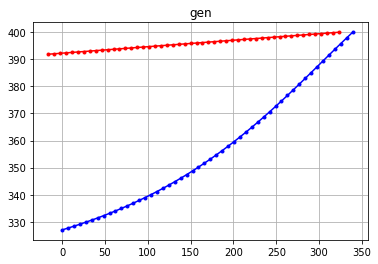

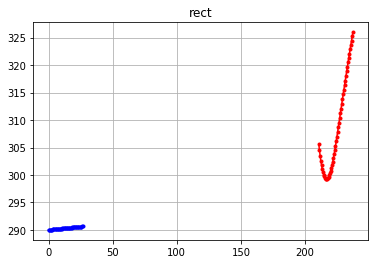

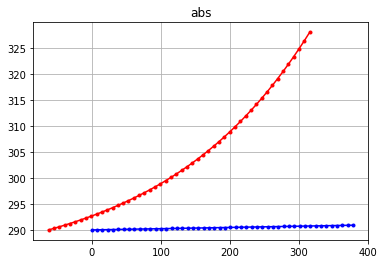

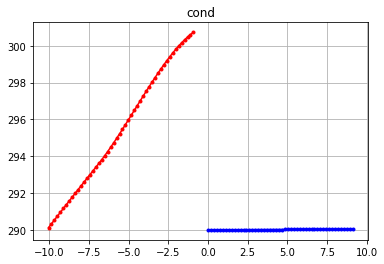

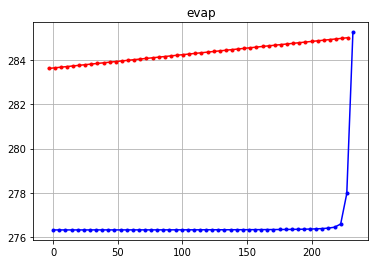

In [79]:
sys.display()
plt.show()

## Run the thing already

In [ ]:
t_heat_reject_range = 273.15 + numpy.arange(10,61,5)
q_fraction_range = [1, 0.999, 0.99, 0.95, 0.9, 0.8, 0.5, 0.2, 0.1]
study = pandas.DataFrame(index=pandas.MultiIndex.from_product([t_heat_reject_range,
                                                               q_fraction_range],
                                                             names=['T_r','q_frac']),
                        columns=['Q'] + trendnames + ['opt', ] )

ch = system_aqua1.makeChiller(opt['x'])


In [ ]:
dry_run = True
# Loop step 1 for all reject temperature cases
for i,index in enumerate(opts2.index):
    tr,qf = index
    q_max = opts2.Q[(tr,1)]
    q_goal = q_max * qf
    print("Case {}, T_heat_reject = {} K, Q_fraction = {}, Q_goal = {}".format(i, tr, qf, q_goal))

    if opts2.opt[index] is numpy.nan or opts2.opt[index] is None:
        print("Case {}, T_heat_reject = {} K".format(i, T_heat_reject))
        q_max_feasible,xopt = opt_step_1(tr)
        opts2.at[(rT,1),'Q'] = ch.Q_evap
        
# Loop step 2 for all reject temperature cases
for i,index in enumerate(opts2.index):
    tr,qf = index
    q_max = opts2.Q[(tr,1)]
    q_goal = q_max * qf
    print("Case {}, T_heat_reject = {} K, Q_fraction = {}, Q_goal = {}".format(i, tr, qf, q_goal))

    if opts2.opt[index] is numpy.nan or opts2.opt[index] is None:
        print("Case {}, T_heat_reject = {} K".format(i, T_heat_reject))
        opt = opt_step_2(tr, qf)
        opts2.at[(rT,1),'Q'] = ch.Q_evap

In [82]:
from util import log_progress

In [ ]:
%%time
for i in log_progress(range(len(study.index)), every=100):
    (x_refrig,T_low,T_med,T_high) = study.index[i]
    if numpy.isnan(study.iloc[i]['constraint',0]):
        spec = makeSpec(T_abs=T_med,T_cond=T_med,T_evap=T_low,T_gen=T_high, x_refrig=x_refrig)
        study.iloc[i]['spec'] = spec
        a1 = AquaChillerSpec1(spec)
        study.iloc[i]['constraint'] = a1.C
        study.iloc[i]['calc'] = a1.calc
        study.iloc[i]['mapped'] = a1.mapped
print("Done.")
#violations[violations>0] = numpy.nan

A Jupyter Widget

In [65]:
a1=AquaChillerSpec1(spec,False)

In [66]:
a1

## Appendix

In [28]:
%%html
<textarea id="TOC-markdown" style="font-family:monospace;width:80%;height:20em;">TOC will be here</textarea>
<script>
$("#TOC-markdown").html(
    $('h1,h2,h3,h4').filter(":has(a)").map(function(){
        return "  ".repeat($(this).prop("tagName")[1]) 
          + "- <a href='" + encodeURI($(this).children().attr("href")) + "'>"
          + $(this).text() + "</a>";}).get().join("\n")
    );
</script>